In [110]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
import math

# Helper Functions

In [376]:
# Function to read a list of images and save their file names as associated titles in a dict
def read_images(path):
    
    # Create empty dictionary
    images = {"images": [], "titles": []}
    
    # Iterate through files in given directory
    for idx, file in enumerate(os.listdir(path)):
        
        # Read files as images
        local_path = path+file
        img = cv2.imread(os.path.abspath(local_path), 0)
        
        # Save name of image
        name = file
        print(name)
        
        # Append to dictionary
        images["images"].append(img)
        images["titles"].append(name)
        
    # Return populated dictionary with images and titles
    return images

In [378]:
# Plot multiple images
def plot_images(images, titles, main_title):
    
    # Determine dimensions for subplot array
    y = math.ceil(len(images)/2)
    x = 2
    
    # Iterate through each image
    for i in range(len(images)):
        fig = plt.subplot(x, y, i + 1)
        
        # Remove axes
        plt.axis("off")
        
        # Plot formatting
        plt.subplots_adjust(wspace=0.8, hspace=0.2, top=0.85)
        plt.title(titles[i])
        fig = plt.gcf()
        fig.set_size_inches(10,5)
        plt.imshow(images[i], cmap="grey")
        
    plt.suptitle(main_title, fontsize=16)

# Read and Plot Original Images

In [211]:
path = "../data/lab05/"
images = read_images(path)

blurry_moon.png
blurry_moon.tif
checkerboard.png
checkerboard.tif
LowDetailImage.tif
skeleton_orig.png
skeleton_orig.tif


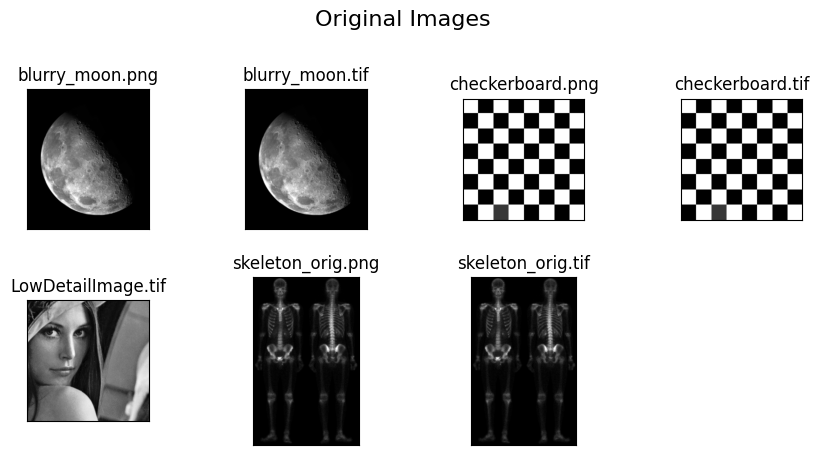

In [231]:
plot_images(images["images"], images["titles"], "Original Images")

# Project 1: Salt and Pepper Noise

In [213]:
# Function to add salt and pepper noise to an image
def salt_and_pepper(image):
    
    # Get dimensions
    rows, cols = image.shape
    
    
    # Apply with a noise density of 0.5%
    density = 0.05
    num_pixels = math.floor(density*rows*cols)
    
    # Copy current image to avoid overwriting the original read image
    new_image = image.copy()
    
    # Pick a random pixel and make it black or white
    for i in range(num_pixels):
        y = random.randint(0, rows-1)
        x = random.randint(0, cols-1)
        
        # Randomly pick black or white
        value = random.choice([0,255])
        new_image[y][x] = value
    
    return new_image

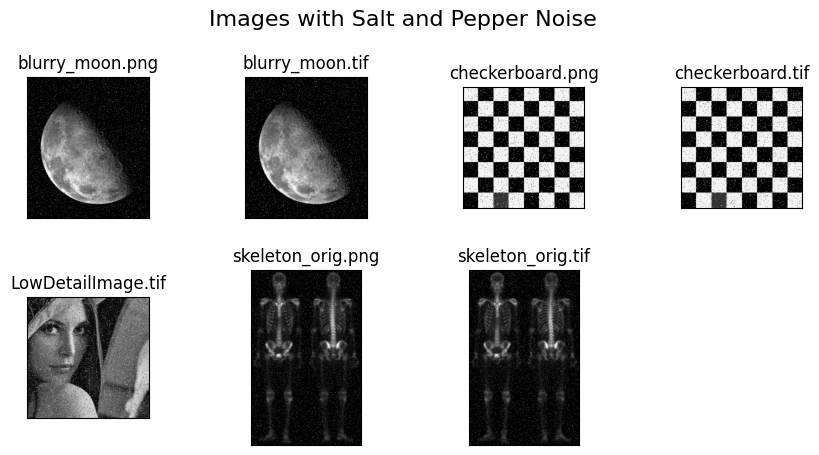

In [214]:
# Apply salt and pepper noise to all images and show them
sp_list = list()
for i in range(len(images["images"])):
    current = salt_and_pepper(images["images"][i])
    sp_list.append(current)

plot_images(sp_list, images["titles"], "Images with Salt and Pepper Noise")

# Project 2: Box or Averaging Low Pass Filter

In [410]:
# Function to apply box filter to an image
def box_filter(image, level):
    blurred_image = cv2.boxFilter(image, -1, (level, level), normalize=True)
    return blurred_image

BOX FILTER 3x3

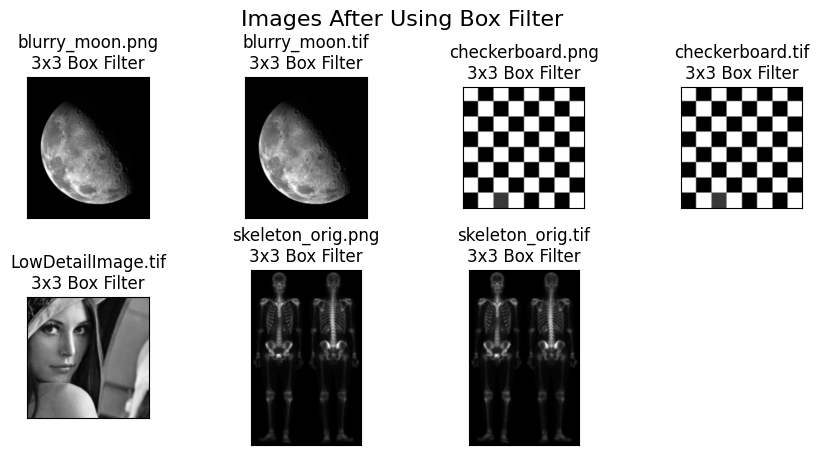

In [216]:
# BOX FILTER LEVEL 3
# Apply box filter with kernel size of 3 to all images
level = 3
bf_list = list()
for i in range(len(images["images"])):
    current = box_filter(images["images"][i], level)
    bf_list.append(current)

bf_titles = [s + f"\n{level}x{level} Box Filter" for s in images["titles"]]
plot_images(bf_list, bf_titles, "Images After Using Box Filter")

BOX FILTER 7x7

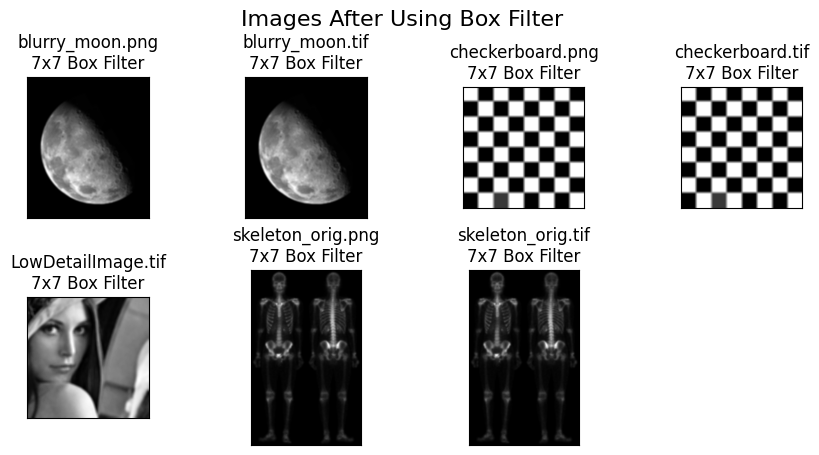

In [217]:
# BOX FILTER LEVEL 7
# Apply box filter with kernel size of 7 to all images
level = 7
bf_list = list()
for i in range(len(images["images"])):
    current = box_filter(images["images"][i], level)
    bf_list.append(current)

bf_titles = [s + f"\n{level}x{level} Box Filter" for s in images["titles"]]
plot_images(bf_list, bf_titles, "Images After Using Box Filter")

BOX FILTER 21x21

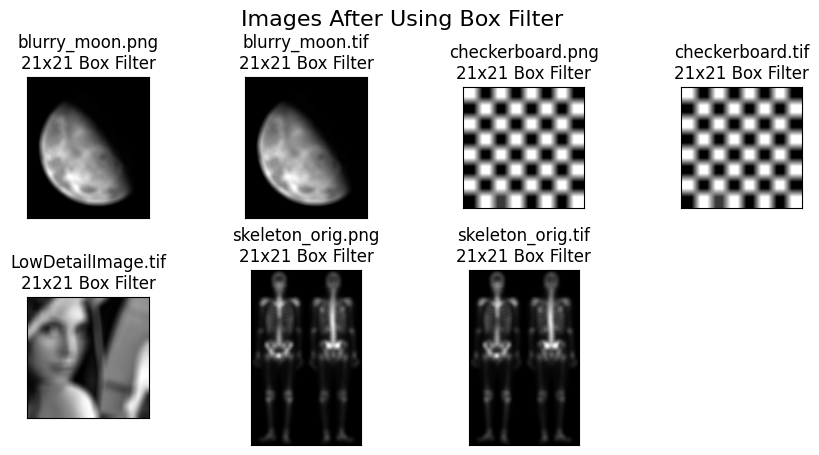

In [218]:
# BOX FILTER LEVEL 21
# Apply box filter with kernel size of 21 to all images
level = 21
bf_list = list()
for i in range(len(images["images"])):
    current = box_filter(images["images"][i], level)
    bf_list.append(current)

bf_titles = [s + f"\n{level}x{level} Box Filter" for s in images["titles"]]
plot_images(bf_list, bf_titles, "Images After Using Box Filter")

BOX FILTER 21x21 NORMALIZED

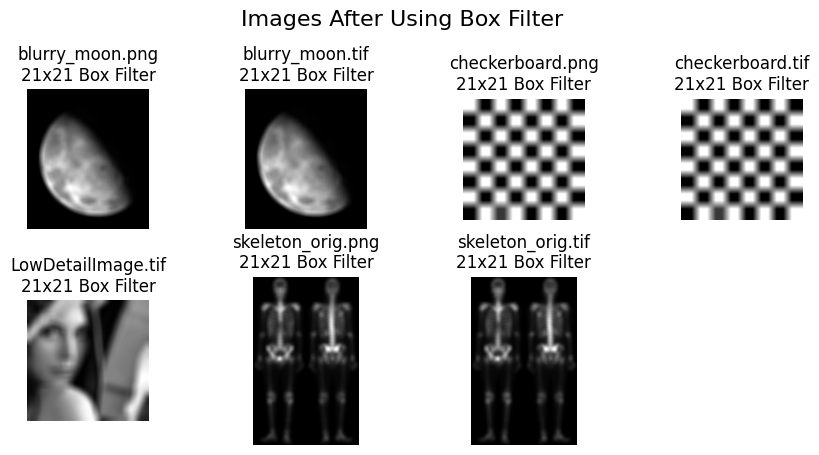

In [411]:
# BOX FILTER LEVEL 21
# Apply box filter with kernel size of 21 to all images
level = 21
bf_list = list()
for i in range(len(images["images"])):
    current = box_filter(images["images"][i], level)
    bf_list.append(current)

bf_titles = [s + f"\n{level}x{level} Box Filter" for s in images["titles"]]
plot_images(bf_list, bf_titles, "Images After Using Box Filter")

BOX FILTER 21x21 on SALT AND PEPPER IMAGES

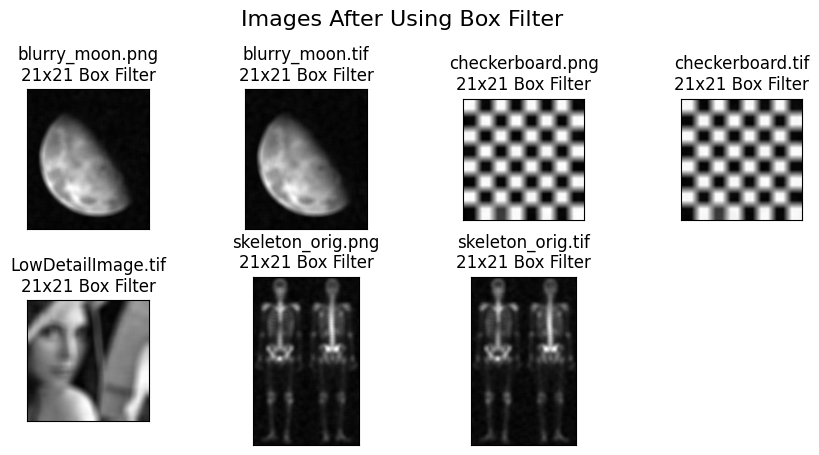

In [237]:
# BOX FILTER LEVEL 21 ON SALT AND PEPPER IMAGES
# Apply box filter with kernel size of 21 to all images with salt and pepper noise
level = 21
bf_list = list()
for i in range(len(sp_list)):
    current = box_filter(sp_list[i], level)
    bf_list.append(current)

bf_titles = [s + f"\n{level}x{level} Box Filter" for s in images["titles"]]
plot_images(bf_list, bf_titles, "Images After Using Box Filter")

# Project 3: Gaussian Smoothing Filter

In [221]:
# Apply Gaussian filter to an image
def gaussian(image, level):
    blurred_image = cv2.GaussianBlur(image, (level, level), 0)
    return blurred_image

GAUSSIAN BLUR 3x3

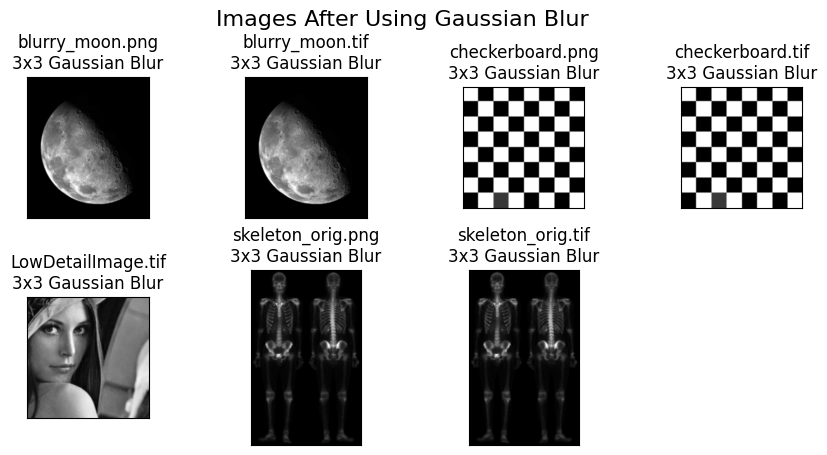

In [223]:
# GAUSSIAN BLUR LEVEL 3
# Apply Gaussian blur filter with kernel size of 3 to all images
level = 3
gb_list = list()
for i in range(len(images["images"])):
    current = gaussian(images["images"][i], level)
    gb_list.append(current)

gb_titles = [s + f"\n{level}x{level} Gaussian Blur" for s in images["titles"]]
plot_images(gb_list, gb_titles, "Images After Using Gaussian Blur")

GAUSSIAN BLUR 7x7

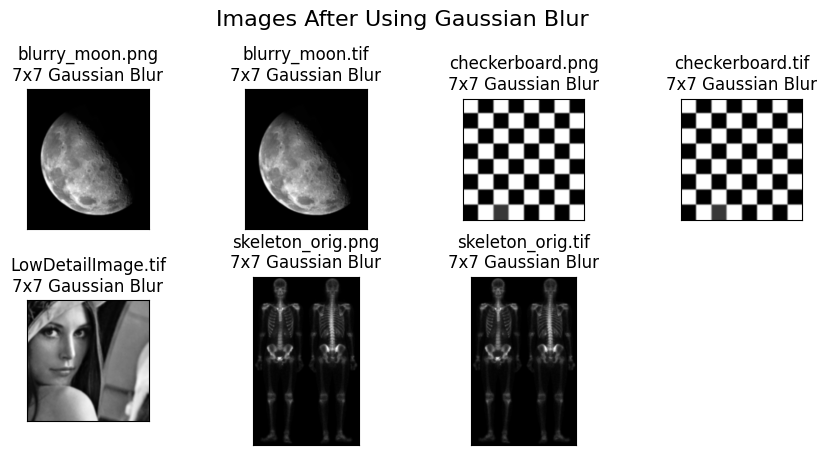

In [240]:
# GAUSSIAN BLUR LEVEL 7
# Apply Gaussian blur filter with kernel size of 7 to all images
level = 7
gb_list = list()
for i in range(len(images["images"])):
    current = gaussian(images["images"][i], level)
    gb_list.append(current)

gb_titles = [s + f"\n{level}x{level} Gaussian Blur" for s in images["titles"]]
plot_images(gb_list, gb_titles, "Images After Using Gaussian Blur")

GAUSSIAN BLUR 21x21

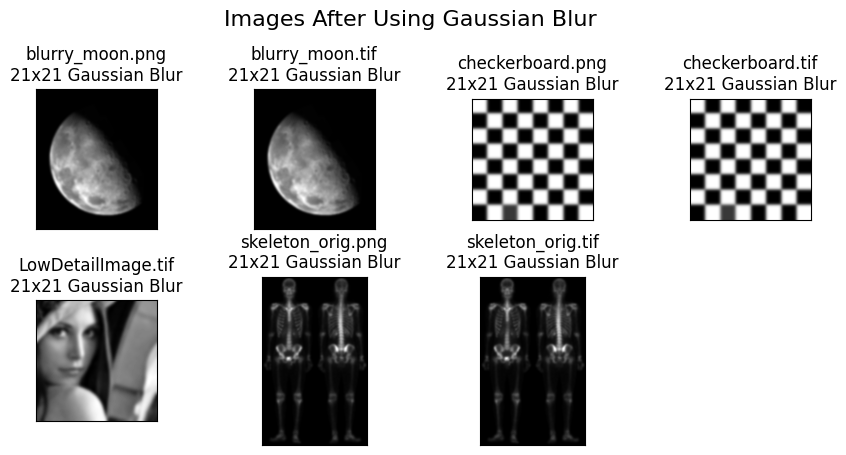

In [239]:
# GAUSSIAN BLUR LEVEL 21
# Apply Gaussian blur filter with kernel size of 21 to all images
level = 21
gb_list = list()
for i in range(len(images["images"])):
    current = gaussian(images["images"][i], level)
    gb_list.append(current)

gb_titles = [s + f"\n{level}x{level} Gaussian Blur" for s in images["titles"]]
plot_images(gb_list, gb_titles, "Images After Using Gaussian Blur")

GAUSSIAN BLUR 21x21 on SALT AND PEPPER IMAGES

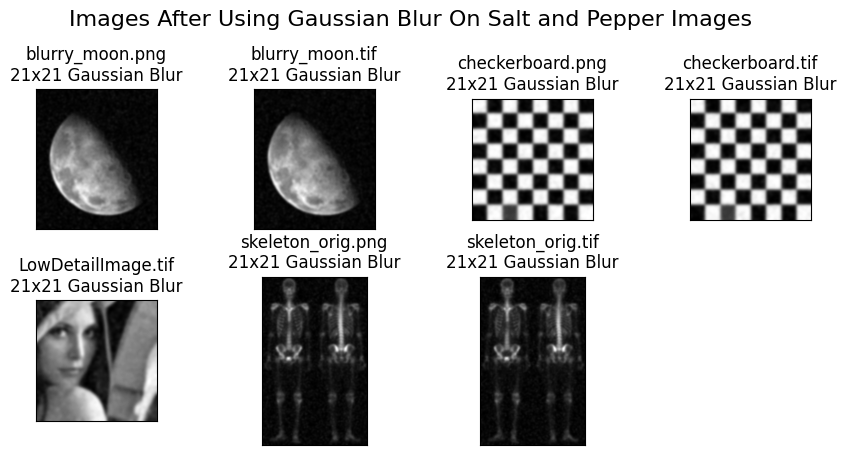

In [238]:
# GAUSSIAN BLUR LEVEL 21
# Apply Gaussian blur filter with kernel size of 21 to all images with salt and pepper noise
level = 21
gb_list = list()
for i in range(len(sp_list)):
    current = gaussian(sp_list[i], level)
    gb_list.append(current)

gb_titles = [s + f"\n{level}x{level} Gaussian Blur" for s in images["titles"]]
plot_images(gb_list, gb_titles, "Images After Using Gaussian Blur On Salt and Pepper Images")

# Project 4: Non-linear Median Low Pass Filter

In [234]:
# Apply median blur filter to an image
def median_blur(image, level):
    blurred_image = cv2.medianBlur(image, level)
    return blurred_image

MEDIAN BLUR 3x3

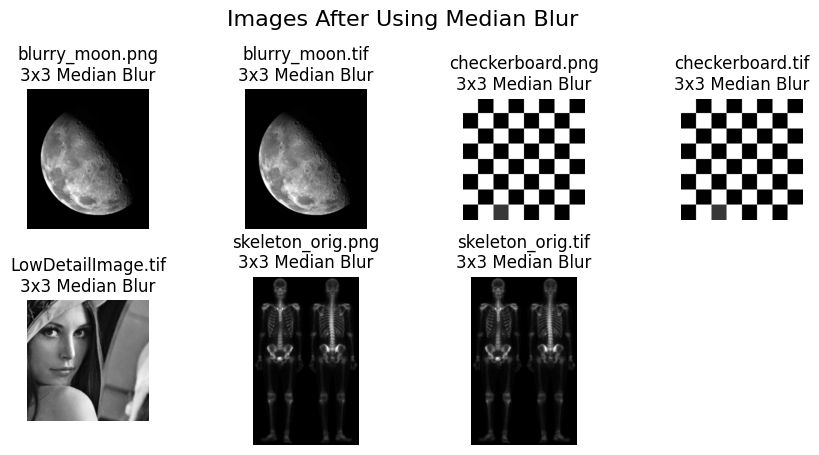

In [412]:
# MEDIAN BLUR LEVEL 3
# Apply median blur filter with kernel size of 3 to all images
level = 3
m_list = list()
for i in range(len(images["images"])):
    current = median_blur(images["images"][i], level)
    m_list.append(current)

m_titles = [s + f"\n{level}x{level} Median Blur" for s in images["titles"]]
plot_images(m_list, m_titles, "Images After Using Median Blur")

MEDIAN BLUR 7x7

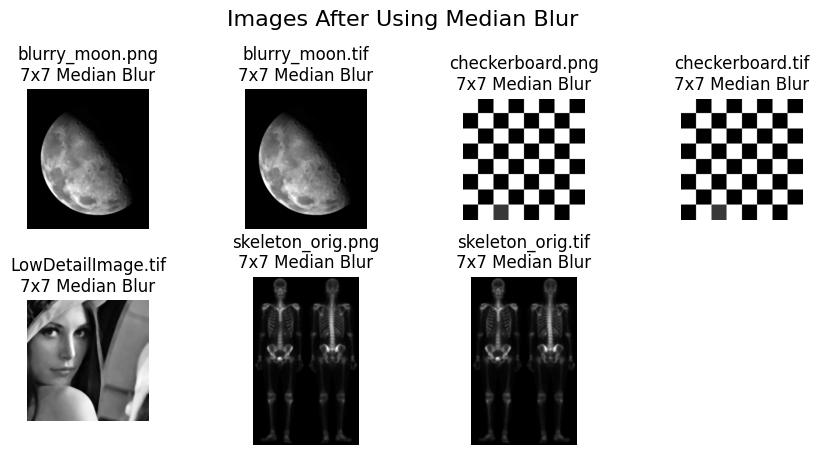

In [413]:
# MEDIAN BLUR LEVEL 7
# Apply median blur filter with kernel size of 7 to all images
level = 7
m_list = list()
for i in range(len(images["images"])):
    current = median_blur(images["images"][i], level)
    m_list.append(current)

m_titles = [s + f"\n{level}x{level} Median Blur" for s in images["titles"]]
plot_images(m_list, m_titles, "Images After Using Median Blur")

MEDIAN BLUR 21x21

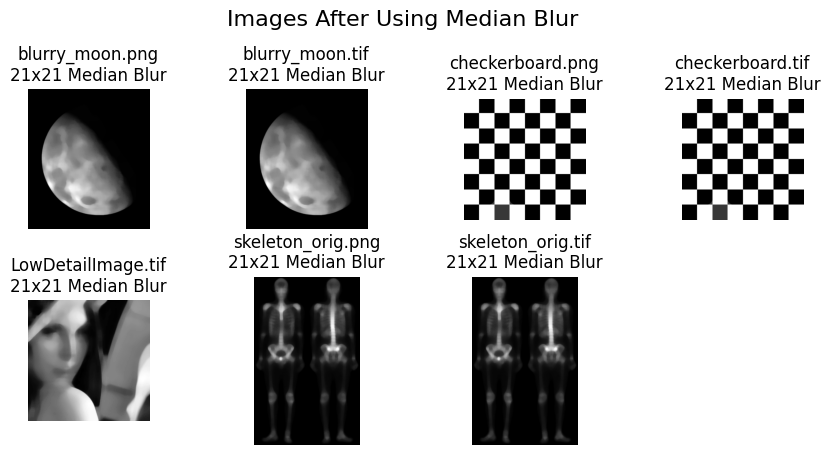

In [414]:
# MEDIAN BLUR LEVEL 21
# Apply median blur filter with kernel size of 21 to all images
level = 21
m_list = list()
for i in range(len(images["images"])):
    current = median_blur(images["images"][i], level)
    m_list.append(current)

m_titles = [s + f"\n{level}x{level} Median Blur" for s in images["titles"]]
plot_images(m_list, m_titles, "Images After Using Median Blur")

MEDIAN BLUR 21x21 on SALT AND PEPPER IMAGES

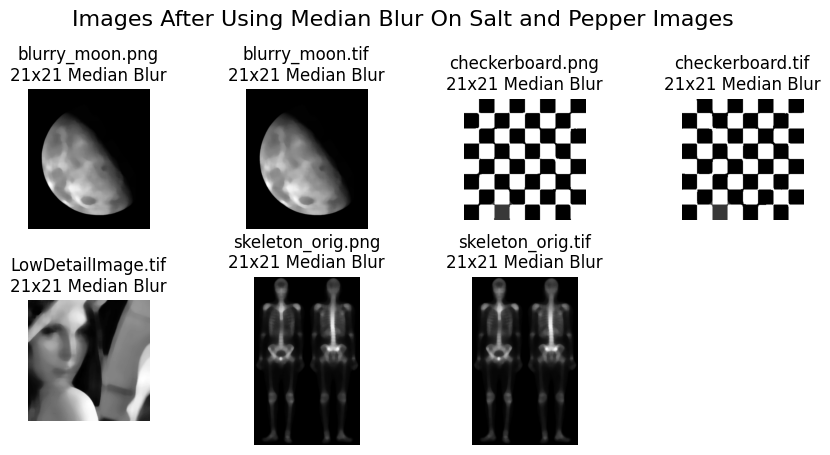

In [416]:
# GAUSSIAN BLUR LEVEL 21
# Apply median blur filter with kernel size of 21 to all images with salt and pepper noise
level = 21
m_list = list()
for i in range(len(sp_list)):
    current = median_blur(sp_list[i], level)
    m_list.append(current)

m_titles = [s + f"\n{level}x{level} Median Blur" for s in images["titles"]]
plot_images(m_list, m_titles, "Images After Using Median Blur On Salt and Pepper Images")

# Project 5: Unsharp Masking and High-boost Filtering

In [423]:
# Read the image
img = cv2.imread("../data/lab05/blurry_moon.tif", cv2.COLOR_BGR2GRAY)

In [424]:
# Blur the image first
blurry_moon = gaussian(img, 21)

In [431]:
# Sharpen -- Subtract the blurred image from the original to get a mask of high-frequency elements
# Add mask to original image
sharpened = cv2.addWeighted(img, 2, blurry_moon, -1, 0)

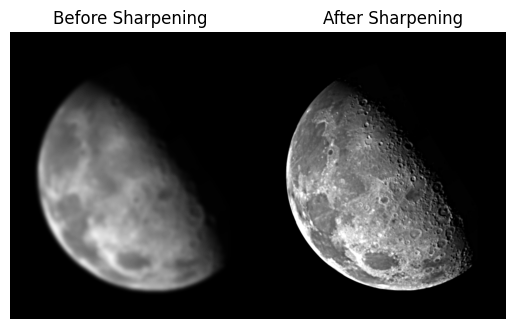

In [428]:
# Plot image before and after sharpening
compare = np.hstack([blurry_moon, sharpened])
fig, ax = plt.subplots()
plt.axis("off")

ax.title.set_text("Before Sharpening                      After Sharpening")
ax.imshow(compare, cmap="grey")

# Project 6: Laplacian Filter

In [379]:
# Read the image and apply salt and pepper noise (as in Project 1)
img = cv2.imread("../data/lab05/blurry_moon.tif", 0)
sp_img = salt_and_pepper(img)

In [380]:
# Apply the Laplacian operator to the image
lap = cv2.Laplacian(sp_img, cv2.CV_64F)

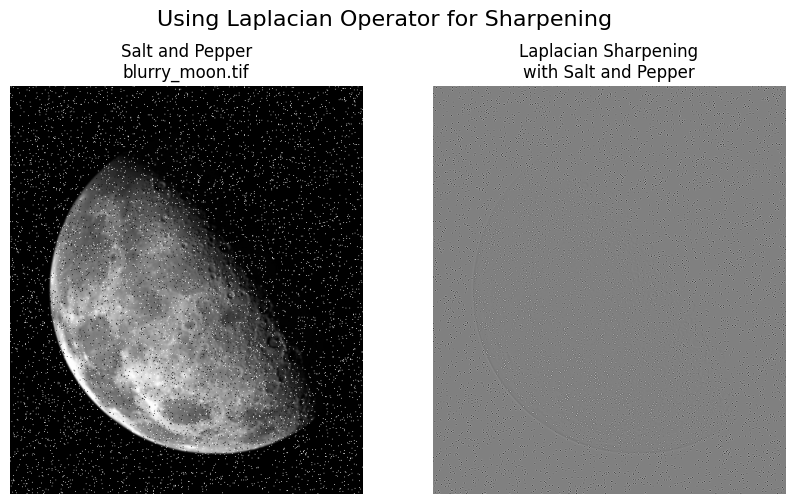

In [382]:
# Compare before and after

# Plot both images
fig = plt.figure(figsize=(10,7))
rows = 1
columns = 2

# Add original image as subplot
fig.add_subplot(rows, columns, 1)
plt.imshow(sp_img, cmap="grey")
plt.axis("off")
plt.title("Salt and Pepper\nblurry_moon.tif")

# Plot image before Laplacian operator
fig.add_subplot(rows, columns, 2)
plt.imshow(lap, cmap="grey")
plt.axis("off")
plt.title(f"Laplacian Sharpening\nwith Salt and Pepper")


# Formatting
plt.suptitle("Using Laplacian Operator for Sharpening", fontsize=16,)
plt.subplots_adjust(top=1.05)


# Project 7: Sobel Filter

In [399]:
# Read the image
img = cv2.imread("../data/lab05/checkerboard.tif")

In [400]:
# Apply Sobel filter
h_sobel = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 5) # horizontal (1, 0)
v_sobel = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 5) # vertical (0, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


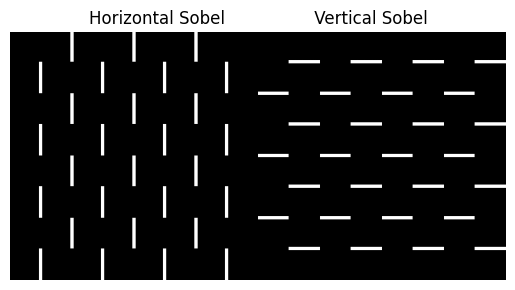

In [401]:
compare = np.hstack([h_sobel, v_sobel])

# Plot both images
fig, ax = plt.subplots()
plt.axis("off")

# Plot formatting
ax.title.set_text("Horizontal Sobel                 Vertical Sobel")
ax.imshow(compare, cmap="grey")

Apply horizontal and then vertical Sobel filter

In [402]:
# Apply Sobel filter
h_sobel = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 5) # horizontal
hv_sobel = cv2.Sobel(h_sobel, cv2.CV_64F, 0, 1, ksize = 5) # vertical applied to horizontal

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


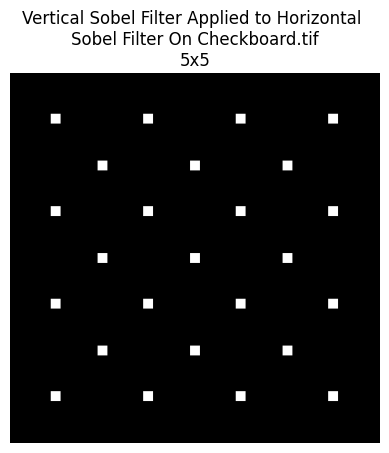

In [403]:
# Plot both images
fig, ax = plt.subplots()
plt.axis("off")

# Plot formatting
ax.title.set_text("Vertical Sobel Filter Applied to Horizontal \nSobel Filter On Checkboard.tif\n5x5")
ax.imshow(hv_sobel, cmap="grey")

# Project 8: Combining Spatial Enhancement Methods

In [433]:
# Read the image (skeleton_orig.tif)
img = cv2.imread("../data/lab05/skeleton_orig.tif")

In [405]:
# Apply Sobel and Laplacian filters/operators
stdev = math.floor(np.std(img)) // 2 * 2 + 1
print(stdev)
skel_sobel = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = stdev)
skel_lap = cv2.Laplacian(skel_sobel, cv2.CV_64F)

29


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


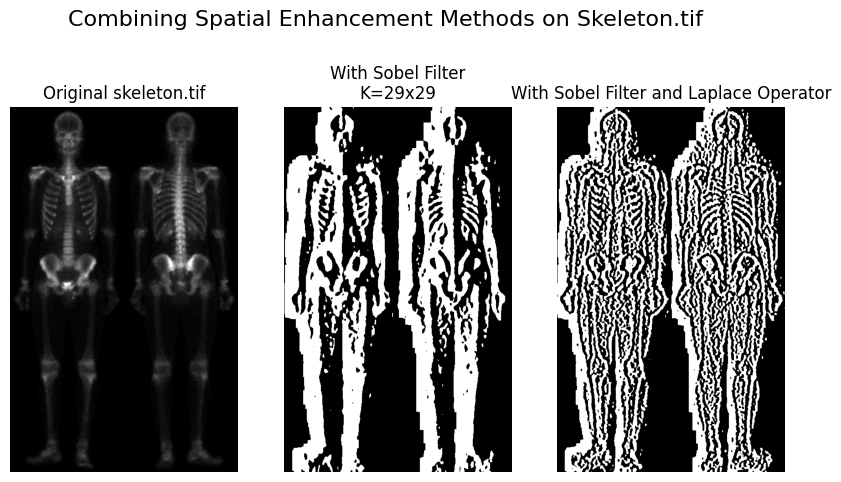

In [406]:
# Compare before and after
#compare = np.hstack([img, skel_lap])

# Plot both images
fig = plt.figure(figsize=(10,7))
rows = 1
columns = 3

# Add original image as subplot
fig.add_subplot(rows, columns, 1)
plt.imshow(img)
plt.axis("off")
plt.title("Original skeleton.tif")

# Add image with Sobel only
fig.add_subplot(rows, columns, 2)
plt.imshow(skel_sobel)
plt.axis("off")
plt.title(f"With Sobel Filter\nK={stdev}x{stdev}")

# Add image with Sobel and Laplace
fig.add_subplot(rows, columns, 3)
plt.imshow(skel_lap)
plt.axis("off")
plt.title("With Sobel Filter and Laplace Operator")

# Formatting
plt.suptitle("Combining Spatial Enhancement Methods on Skeleton.tif", fontsize=16,)
plt.subplots_adjust(top=1.05)
